In [1]:
%matplotlib inline

In [2]:
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np
from urllib2 import Request, urlopen
import re
import ssl
from datetime import datetime
from IPython.display import HTML

In [3]:
channel   = '02'
sector    = 'M2'
numImages = 30

data      = open('output.txt', 'rb')
dUrl      = data.readline()
dUrl      = dUrl.strip('\r\n')
dUrl      = dUrl.strip(' ')
context   = ssl._create_unverified_context()

strBand   = 'C'+channel+'_'
strSector = sector+'-'
curImages = []
for line in data:
    group      = line.split(' ')
    date       = group[0]
    time       = group[1]    
    ncFileName = group[len(group)-1]
    ncFileName = ncFileName.strip('\r\n')
    ncFileName = ncFileName.strip(' ')
    if strBand in ncFileName and strSector in ncFileName:
        fullDate   = datetime.strptime(date+' '+time, '%Y-%m-%d %H:%M:%S')
        curImages.append([fullDate, ncFileName])
curImages.sort(reverse=True)
##for i in range(0,numImages):
##    oFile  = './data/'+curImages[i][1]        
##    with open(oFile, 'wb') as f:
##        ncReq  = Request(dUrl+curImages[i][1])
##        ncFile = urlopen(ncReq, context=context) 
##        f.write(ncFile.read())
##    ncFile.close()
##    print('grabbing nc file '+str(int(i+1))+' of '+str(numImages))
    
# Read in Level 2 NetCDF
FFwriter = ani.writers['ffmpeg']
writer = FFwriter(fps=20, bitrate=50000)
ims = []
fig = plt.figure(dpi=200)#figsize=(3,3),dpi=300)
##clrMap = matplotlib.colors.Colormap('Greys_r')
plt.axis('off')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
##with writer.saving(fig, 'Maria_Loop.mp4', numImages):
for i in range(numImages,0,-1):
    dataPath = 'data/'+curImages[i-1][1]
    g16nc = Dataset(dataPath, 'r')
    ref_ch2 = g16nc.variables['CMI'][:]
    g16nc.close()
    g16nc = None

# Apply the formula to adjust reflectance gamma
    ref_gamma = np.sqrt(ref_ch2)
# Plot gamma adjusted reflectance    
    im = plt.imshow(ref_gamma, vmin=0.0, vmax=1.0, cmap='Greys_r',
                    animated=True, aspect='auto')
##    writer.grab_frame()
    ims.append([im])

anim = ani.ArtistAnimation(fig, ims, blit=True)
HTML(anim.to_html5_video())

##anim.save('Maria_Loop.mp4', writer=writer)


MemoryError: 

MemoryError: 

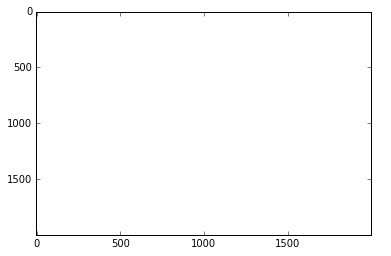

In [6]:
HTML(animHtml)

In [7]:
fig.clf()
plt.close()    